In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter, WeibullFitter
import matplotlib.pyplot as plt

In [2]:
# Example synthetic prepayment data
data = pd.DataFrame({
    'duration': [12, 18, 10, 20, 15, 8, 22, 16, 14, 25],  # months until prepayment or censoring
    'event':    [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],           # 1=prepayment, 0=censored
    'interest_rate': [3.5, 4.0, 3.8, 3.9, 4.2, 3.7, 4.5, 3.6, 3.9, 4.1],
    'credit_score':  [700, 650, 720, 710, 630, 680, 640, 690, 705, 625]
})

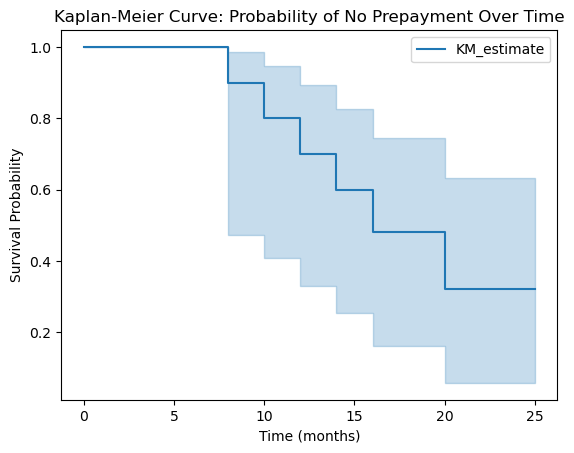

In [3]:
# 1. Kaplan-Meier curve (no covariates)
kmf = KaplanMeierFitter()
kmf.fit(data['duration'], event_observed=data['event'])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Curve: Probability of No Prepayment Over Time')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.show()

<lifelines.CoxPHFitter: fitted with 10 total observations, 4 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 10
number of events observed = 6
   partial log-likelihood = -6.74
         time fit was run = 2025-05-27 19:01:16 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
interest_rate -3.97      0.02      2.71           -9.28            1.34                0.00                3.80
credit_score   0.04      1.04      0.03           -0.03            0.10                0.97                1.10

               cmp to     z    p  -log2(p)
covariate                                 
interest_rate    0.00 -1.47 0.14      2.81
credit_score     0.00  1.13 0.26      1.94
---
Concordance = 0.78
Partial AIC = 17.49
log-likelihood ratio test = 8.98 on 2 df
-log2(p) of ll-ratio test = 6.48

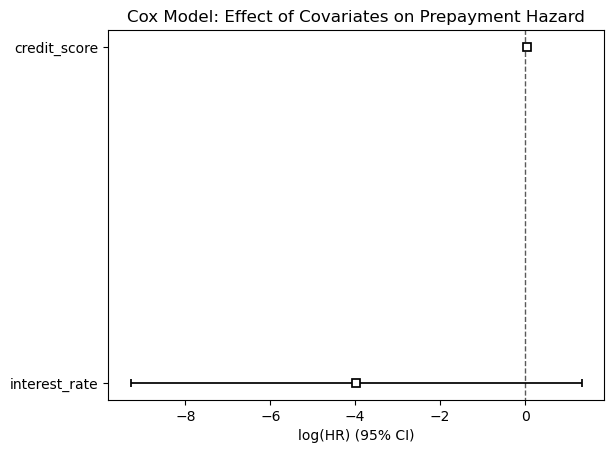

In [4]:
# 2. Cox Proportional Hazards model (with covariates)
cph = CoxPHFitter()
cph.fit(data, duration_col='duration', event_col='event')
cph.print_summary()

# Plot hazard ratios for covariates
cph.plot()
plt.title('Cox Model: Effect of Covariates on Prepayment Hazard')
plt.show()

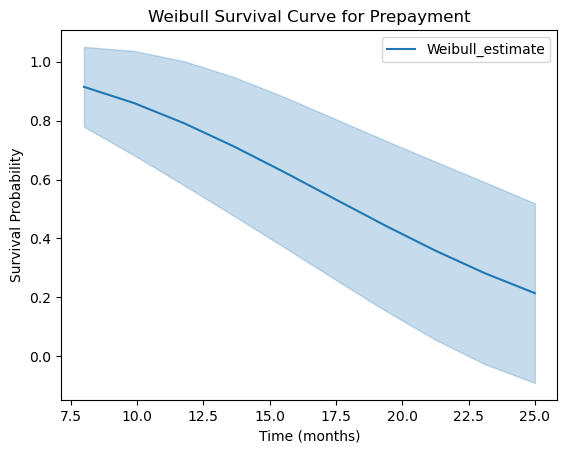

In [5]:
# 3. Weibull parametric model (no covariates for simplicity)
wf = WeibullFitter()
wf.fit(data['duration'], event_observed=data['event'])
wf.plot_survival_function()
plt.title('Weibull Survival Curve for Prepayment')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.show()
